### Installing and importing libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import TomekLinks

import matplotlib.patches as mpatches
import time

In [2]:
%pip install scipy
%pip install matplotlib
%pip install numpy
%pip install pandas
%pip install seaborn
%pip install scikit-learn
%pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### STEP 2: Introducing and Loading the Dataset -- Esther

In [4]:
# Load in the dataset from a csv
#csv = pd.read_csv('data/creditcard.csv')
csv = pd.read_csv('data/creditcard.csv')

# Convert the data to a pandas dataframe
cc_data = pd.DataFrame(csv)

# Get the shape of the dataframe: (rows, columns)
cc_data.shape

(284807, 31)

In [5]:
# See the first five rows of the dataframe:
cc_data.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
248539,153989.0,1.883404,0.420368,-1.249500,3.873610,0.521815,-0.517845,0.558620,-0.185501,-0.828144,...,-0.028388,-0.178435,0.065017,-0.184188,0.156459,0.029702,-0.083572,-0.058602,48.33,0
213810,139400.0,2.212602,-1.494192,-0.816961,-1.526474,-1.464529,-0.712548,-1.196835,-0.089879,-1.321466,...,-0.012452,0.418780,0.176719,-0.004523,-0.194027,-0.084164,0.004006,-0.061146,28.62,0
197894,132227.0,-1.516071,1.872813,-1.308992,-0.621501,0.793450,0.264860,0.936111,-0.015932,1.120399,...,0.263533,1.283076,-0.007847,-1.115533,-0.391339,-0.081969,0.204016,0.477002,53.00,0
179106,123925.0,0.212355,1.174902,-1.033628,0.004989,0.285205,-1.494538,0.539967,0.124573,-0.108562,...,0.313979,0.906748,-0.107697,-0.040370,-0.285301,-0.151049,-0.066576,-0.045670,1.50,0
589,441.0,-0.565329,-0.061420,2.197934,-1.958795,-0.048529,0.748808,0.296588,-0.149943,1.209929,...,0.104993,0.885525,-0.548767,-0.711467,0.267147,0.242160,-0.306742,-0.410484,50.00,0


### STEP 3: Exploratory data analysis -- Ria

In [6]:
# See how much of our original data was fraudulent, etc.
print('No Fraud:', round(cc_data['Class'].value_counts()[0]/len(cc_data) * 100,2), '% of the dataset')
print('Frauds:', round(cc_data['Class'].value_counts()[1]/len(cc_data) * 100,2), '% of the dataset')

No Fraud: 99.83 % of the dataset
Frauds: 0.17 % of the dataset


### Notice how the dataset is imbalanced

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

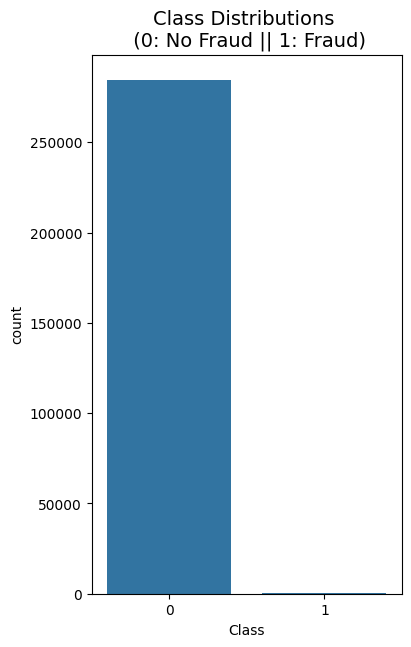

In [7]:
# Create a bar chart that visualizes the imbalance between fraudulent and non-fraudulent data
plt.figure(figsize = (4, 7))
sns.countplot(data=cc_data, x='Class')
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

In [8]:
#Seeing what the fraud vs non-fraud data looks like 

fraud_cc_data = cc_data.loc[cc_data['Class'] == 1]
non_fraud_cc_data = cc_data.loc[cc_data['Class'] == 0][:492]
display(fraud_cc_data.head())
display(non_fraud_cc_data.head())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
""" 
Check for missing data.
This is important because we want to make sure that our data is clean before moving forward.
"""
print("Missing data in each column:\n" + str(cc_data.isnull().sum()))

Missing data in each column:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


### Great! There's no missing data.

## STEP 4: Initializing a Baseline Model with sklearn (no undersampling) -- MILLER

NOTE: idt we need this data splitting, just initialize a baseline model with no undersampling.

STEAL FROM OVERSAMPLING FOR THIS!

Choose what features we should build the rest of our model on.


### WE'RE USING RANDOM FORESTS AS OUR CLASSIFIER

In [28]:
# We want two variables we can visualize in a plot.
# The two columns we will get are 
# um
# personally V1 and V4 stick out to me so i'm gonna plot these, feel free to play around

# Split into input, features_trained_on, and output, output_feature
features_trained_on = cc_data.iloc[:, [1, 4]]

output_feature = cc_data.iloc[:, -1]

(284807, 2)


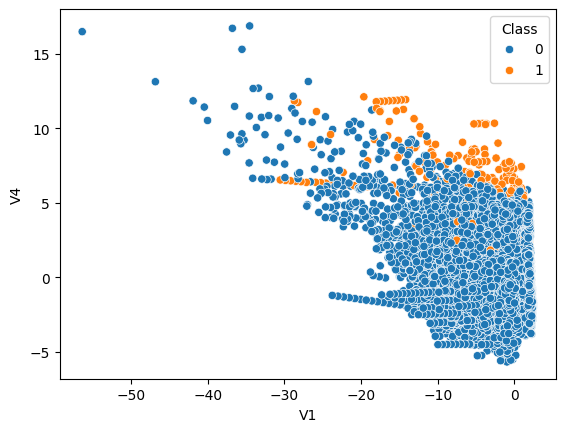

In [30]:
# plot these on a scatter plot to see how they differ between the two classes
ax = sns.scatterplot(data=cc_data, x='V1', y='V4', hue='Class')
plt.show()

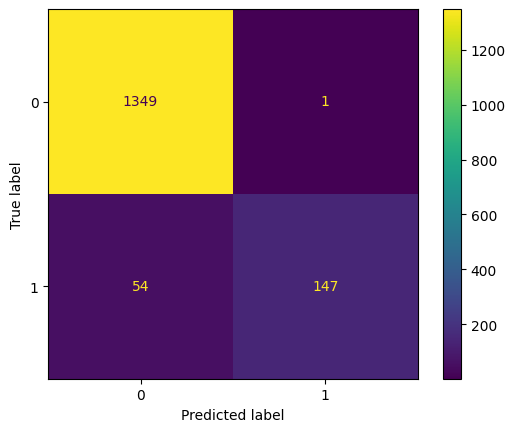

In [132]:
#compute the confusion matrix.
cm = confusion_matrix(Y_test, predictions)

 #Plot the confusion matrix.
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

## STEP 4b: Evaluation with Performance Metrics -- Alyssa

In this naive implementation of our model, using no aspect of downsampling to modify and clean our data, we get this for our accuracy:

## STEP 5: Downsampling Techniques -- Esther (just write the general blurb for this)

### Random Undersampling -- Esther

### Random Under-Sampling

In [ ]:
colors = ["#0101DF", "#DF0101"]

sns.countplot(data=df, x='Class', palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

In [11]:
print('Top 5 common duplicate texts are:')
data[data.duplicates == 1].pivot_table(index='text', values='target', aggfunc='count').sort_values(by='target', ascending=False).head(5)

Top 5 common duplicate texts are:


,target
text,
"Sorry, I'll call later",30
I cant pick the phone right now. Pls send a message,12
Ok...,10
"Say this slowly.? GOD,I LOVE YOU &amp; I NEED YOU,CLEAN MY HEART WITH YOUR BLOOD.Send this to Ten special people &amp; u c miracle tomorrow, do it,pls,pls do it...",4
"Wen ur lovable bcums angry wid u, dnt take it seriously.. Coz being angry is d most childish n true way of showing deep affection, care n luv!.. kettoda manda... Have nice day da.",4


###  Near Miss Undersampling -- Ria

In [39]:
from imblearn.under_sampling import NearMiss

#Splitting the data into features and labels 
X = cc_data.iloc[:,:30]
y = cc_data.iloc[:, 30]

near_miss = NearMiss()
X_resample, y_resample = near_miss.fit_resample(X,y)

print("Before Undersampling, counts of label '1': {}".format(sum(y == 1)))
print("Before Undersampling, counts of label '0': {} \n".format(sum(y == 0))) 
  
print("After Undersampling, counts of label '1': {}".format(sum(y_resample == 1))) 
print("After Undersampling, counts of label '0': {}".format(sum(y_resample == 0))) 

Before Undersampling, counts of label '1': 492
Before Undersampling, counts of label '0': 284315 

After Undersampling, counts of label '1': 492
After Undersampling, counts of label '0': 492


To see the benefits of NearMiss, we can evaluate with performance metrics such as ROC and PR curves.

In [ ]:
# This function gets the baseline of False Positive Rate (FPR) and True Positive Rate (TPR)
# Getting the ROC curve and plotting
nm_fpr, nm_tpr, nm_thresholds = metrics.roc_curve(Y_test, y_class1_pred_prob, pos_label=1)

# Finding the AUC score
nm_roc_auc = metrics.auc(nm_fpr, nm_tpr)


### Tomek Link Undersampling -- Miller